In [1]:
import mdtraj as md
import barnaba as bb

traj = md.load("SL_23_50K.xtc",top="../sample_SL23.pdb",stride=4)
print(traj)
gvecs,res = bb.dump_gvec_traj(traj)

<mdtraj.Trajectory with 13466 frames, 1014 atoms, 32 residues, and unitcells>


In [2]:
import barnaba.cluster as cc

gvecsr = gvecs.reshape(gvecs.shape[0],-1)
print(gvecsr.shape)

vint,wint = cc.pca(gvecsr,nevecs=3)
#v2,w2 = cc.pca(gvecs2,nevecs=3)

print("# Cumulative explained variance of component: 1=%5.1f 2:=%5.1f 3=%5.1f" % (vint[0]*100,vint[1]*100,vint[2]*100))



(13466, 4096)
# Cumulative explained variance of component: 1= 19.4 2:= 30.5 3= 38.5


In [3]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecs.shape[0]/2)
plt.scatter(wint[:lhalf,0],wint[:lhalf,1],s=1)
plt.scatter(wint[lhalf:,0],wint[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

Text(0, 0.5, 'PC2')

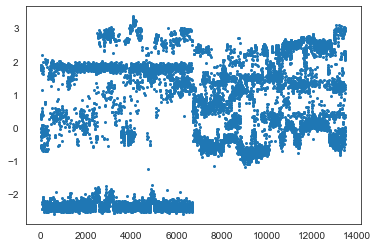

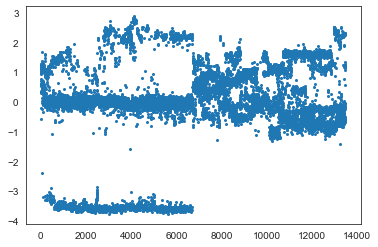

In [9]:
plt.plot(wint[:,0],"o",markersize=2)
plt.show()
plt.close()
plt.plot(wint[:,1],"o",markersize=2)

In [4]:
import numpy as np
ll=len(res)
new_labels, center_idx = cc.dbscan(gvecsr,range(gvecsr.shape[0]),eps=0.5,min_samples=100)

# eps:2.828 min_samples:100  nclusters: 16
#  silhouette score: 0.2144
# Avg silhouette: 0.3936 
# assigned samples :9862 total samples:13466 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 3891                0.797                0.477                0.602                0.406 00 3512
# 01 1146                0.831                0.489                0.614                0.410 02 2527
# 02 1133                0.877                0.573                0.697                0.501 01 7510
# 03 0829                0.835                0.495                0.643                0.406 13 10966
# 04 0518                0.814                0.549                0.638                0.481 14 12383
# 05 0474                0.841                0.561                0.640                0.495 12 13136
# 06 0359                0.787                0.531                0.614                0.454 08 8266
# 07 0271                0.791        

t1 3512
t1 2527
t1 7510
t1 10966
t1 12383
t1 13136
t1 8266
t1 8638
t1 8222
t1 6797
t1 9590
t1 3581
t1 12616
t1 11695
t1 4661
t1 4418


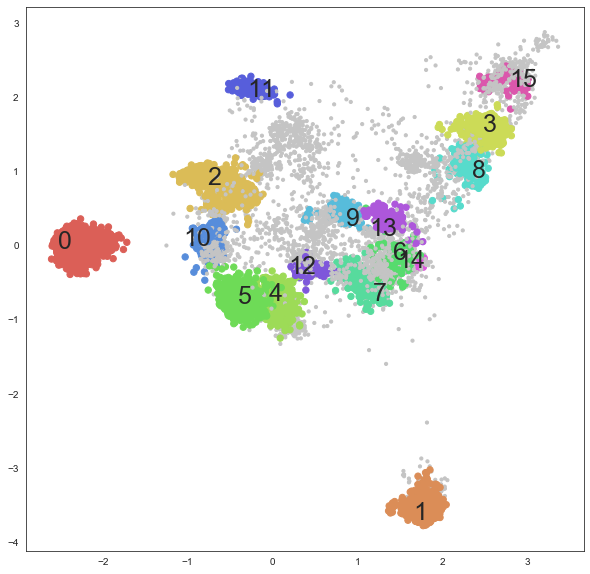

In [5]:
cp = sns.color_palette("hls",len(center_idx)+1)
colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in new_labels]
size = [40 if(j!=0) else 10 for j in new_labels]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
plt.scatter(wint[:,0],wint[:,1],s=size,c=colors)
for i,k in enumerate(center_idx):
    plt.text(wint[k,0],wint[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_SL23_%d.pdb" %i )

In [12]:


region_a = [20,21,22,23,24,25,26,27,28]
int_loop_a = gvecs[:,region_a,:,:]
int_loop_a = int_loop_a[:,:,region_a,:]
int_loop_a = int_loop_a.reshape(int_loop_a.shape[0],-1)

v_a,w_a = cc.pca(int_loop_a,nevecs=3)

Text(0, 0.5, 'PC2')

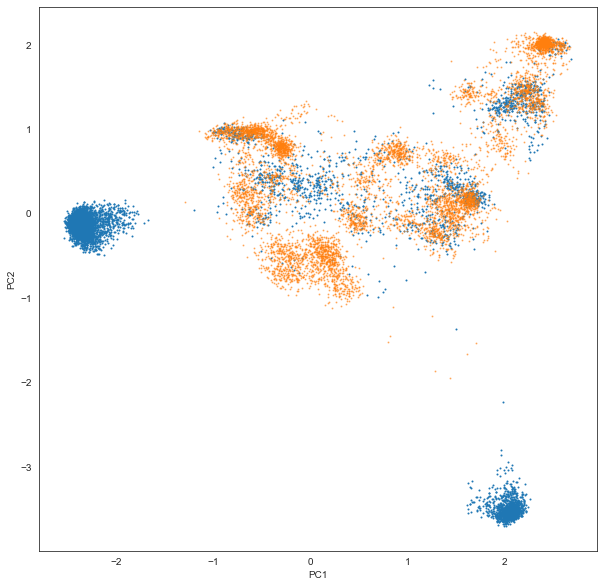

In [13]:
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_a[:lhalf,0],w_a[:lhalf,1],s=1)
plt.scatter(w_a[lhalf:,0],w_a[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [14]:
labels_a, center_idx_a = cc.dbscan(int_loop_a,range(int_loop_a.shape[0]),eps=0.5,min_samples=50)

# eps:1.500 min_samples:50  nclusters: 24
#  silhouette score: 0.3373
# Avg silhouette: 0.5490 
# assigned samples :10390 total samples:13466 
#  N size       max eRMSD (IC)       med eRMSD (IC) max eRMSD (centroid) med eRMSD (centroid) center 
# 00 3892                1.056                0.452                0.766                0.340 00 2991
# 01 1250                1.298                0.759                0.989                0.654 03 7712
# 02 1175                1.154                0.491                0.836                0.356 02 1817
# 03 0814                1.192                0.446                0.808                0.313 06 12653
# 04 0515                1.100                0.656                0.892                0.517 22 10911
# 05 0370                1.210                0.654                0.835                0.567 21 11448
# 06 0350                1.131                0.673                0.820                0.535 08 8357
# 07 0347                1.087        

t1 2991
t1 7712
t1 1817
t1 12653
t1 10911
t1 11448
t1 8357
t1 10225
t1 8679
t1 6772
t1 10432
t1 9295
t1 7231
t1 11855
t1 5073
t1 11358
t1 10107
t1 11888
t1 6361
t1 13199
t1 9697
t1 550
t1 68
t1 10423


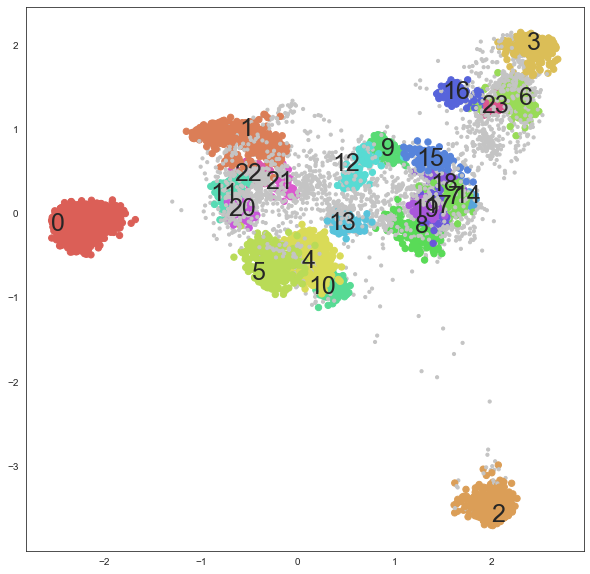

In [15]:
cp = sns.color_palette("hls",len(center_idx_a)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_a]
size = [40 if(j!=0) else 10 for j in labels_a]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_a[:,0],w_a[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_a):
    plt.text(w_a[k,0],w_a[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_SL3_L_%d.pdb" %i )

In [16]:
region_b = [10,11,12,32,33]
int_loop_b = gvecs[:,region_b,:,:]
int_loop_b = int_loop_b[:,:,region_b,:]
int_loop_b = int_loop_b.reshape(int_loop_b.shape[0],-1)

v_b,w_b = cc.pca(int_loop_b,nevecs=3)
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_b[:lhalf,0],w_b[:lhalf,1],s=1)
plt.scatter(w_b[lhalf:,0],w_b[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

IndexError: index 32 is out of bounds for axis 1 with size 32

In [ ]:
labels_b, center_idx_b = cc.dbscan(int_loop_b,range(int_loop_b.shape[0]),eps=0.5,min_samples=50)

In [ ]:
cp = sns.color_palette("hls",len(center_idx_b)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_b]
size = [40 if(j!=0) else 10 for j in labels_b]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_b[:,0],w_b[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_b):
    plt.text(w_b[k,0],w_b[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_b_%d.pdb" %i )

In [ ]:
region_c = [15,16,17,27,28,29]
int_loop_c = gvecs[:,region_c,:,:]
int_loop_c = int_loop_c[:,:,region_c,:]
int_loop_c = int_loop_c.reshape(int_loop_c.shape[0],-1)

v_c,w_c = cc.pca(int_loop_c,nevecs=3)
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_c[:lhalf,0],w_c[:lhalf,1],s=1)
plt.scatter(w_c[lhalf:,0],w_c[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
labels_c, center_idx_c = cc.dbscan(int_loop_c,range(int_loop_b.shape[0]),eps=0.5,min_samples=50)

In [ ]:
cp = sns.color_palette("hls",len(center_idx_c)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_c]
size = [40 if(j!=0) else 10 for j in labels_c]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_c[:,0],w_c[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_c):
    plt.text(w_c[k,0],w_c[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_c_%d.pdb" %i )

In [ ]:
region_d = [19,20,21,22,23,24,25]
int_loop_d = gvecs[:,region_d,:,:]
int_loop_d = int_loop_d[:,:,region_d,:]
int_loop_d = int_loop_d.reshape(int_loop_d.shape[0],-1)

v_d,w_d = cc.pca(int_loop_d,nevecs=3)
fig, axs = plt.subplots(1,1,figsize=(10,10))
lhalf = int(gvecsr.shape[0]/2)
plt.scatter(w_d[:lhalf,0],w_d[:lhalf,1],s=1)
plt.scatter(w_d[lhalf:,0],w_d[lhalf:,1],s=1,alpha=0.5)

plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
labels_d, center_idx_d = cc.dbscan(int_loop_d,range(int_loop_d.shape[0]),eps=0.5,min_samples=50)

In [ ]:
cp = sns.color_palette("hls",len(center_idx_d)+1)

colors = [cp[j-1] if(j!=0) else (0.77,0.77,0.77) for j in labels_d]
size = [40 if(j!=0) else 10 for j in labels_d]
fig, axs = plt.subplots(1,1,figsize=(10,10))

#do scatterplot
lim = gvecsr.shape[0]
plt.scatter(w_d[:,0],w_d[:,1],s=size,c=colors)
for i,k in enumerate(center_idx_d):
    plt.text(w_d[k,0],w_d[k,1],str(i),ha='center',va='center',fontsize=25)
    print("t1",k)
    traj[k].save("center_int_d_%d.pdb" %i )